<a href="https://colab.research.google.com/github/Syauqi366/eda/blob/main/pertemuan7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/eda/praktikum7"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

# Verify that the file exists at this path in your Google Drive.
df = pd.read_excel(path + '/data/tugas.xlsx')
df.head()

print("\n=== Tipe Data Tiap Kolom ===")
print(df.dtypes)



=== Tipe Data Tiap Kolom ===
Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [ ]:
print("\n=== Statistik Deskriptif ===")
print(df.describe())


=== Statistik Deskriptif ===
               Age  Years of Experience          Salary
count  6707.000000          6705.000000     6703.000000
mean     33.623677             8.096346   115446.119200
std       7.621529             6.067248    53881.790154
min      21.000000             0.000000      350.000000
25%      28.000000             3.000000    70000.000000
50%      32.000000             7.000000   115000.000000
75%      38.000000            12.000000   160000.000000
max      62.000000            35.000000  1000000.000000


In [ ]:
print("\n=== Jumlah Missing Values per Kolom ===")
print(df.isnull().sum())


=== Jumlah Missing Values per Kolom ===
Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64


In [ ]:
print("\n=== Jumlah Data Duplikat ===")
print(df.duplicated().sum())


=== Jumlah Data Duplikat ===
4913


In [ ]:
print("\n=== Ukuran Pemusatan Data ===")
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nModus:\n", df.mode().iloc[0])



=== Ukuran Pemusatan Data ===
Mean:
 Age                        33.623677
Years of Experience         8.096346
Salary                 115446.119200
dtype: float64

Median:
 Age                        32.0
Years of Experience         7.0
Salary                 115000.0
dtype: float64

Modus:
 Age                                   27
Gender                              Male
Education Level        Bachelor's Degree
Job Title              Software Engineer
Years of Experience                  2.0
Salary                          140000.0
Name: 0, dtype: object


In [ ]:
print("\n=== Ukuran Penyebaran Data ===")
print("Range:\n", df.max(numeric_only=True) - df.min(numeric_only=True))
print("\nVariansi:\n", df.var(numeric_only=True))
print("\nStandar Deviasi:\n", df.std(numeric_only=True))
print("\nKuartil (Q1, Q2, Q3):\n", df.select_dtypes(include=np.number).quantile([0.25, 0.5, 0.75]))


=== Ukuran Penyebaran Data ===
Range:
 Age                        41.0
Years of Experience        35.0
Salary                 999650.0
dtype: float64

Variansi:
 Age                    5.808771e+01
Years of Experience    3.681149e+01
Salary                 2.903247e+09
dtype: float64

Standar Deviasi:
 Age                        7.621529
Years of Experience        6.067248
Salary                 53881.790154
dtype: float64

Kuartil (Q1, Q2, Q3):
        Age  Years of Experience    Salary
0.25  28.0                  3.0   70000.0
0.50  32.0                  7.0  115000.0
0.75  38.0                 12.0  160000.0


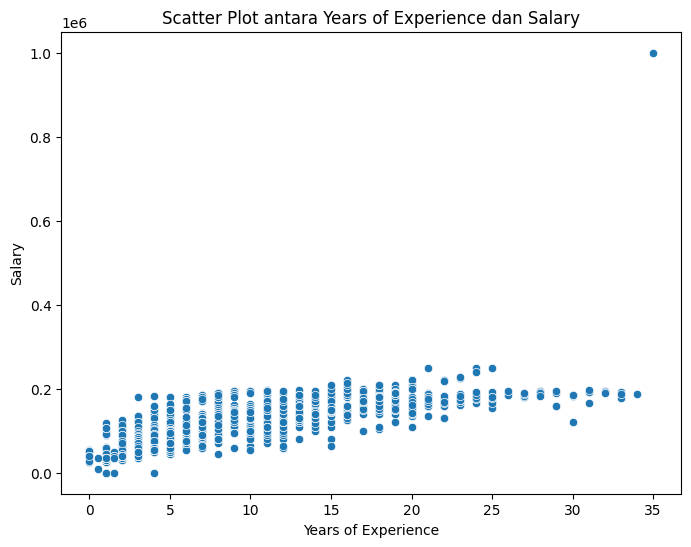

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
if len(num_cols) >= 2:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=num_cols[1], y=num_cols[2], data=df)
    plt.title(f"Scatter Plot antara {num_cols[1]} dan {num_cols[2]}")
    plt.show()

In [ ]:
df = df.drop_duplicates()
print("\n=== Setelah Menghapus Duplikat ===")
print(df.duplicated().sum())


=== Setelah Menghapus Duplikat ===
0


In [ ]:
df_clean = df.copy()
df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))
df_clean = df_clean.fillna(df_clean.mode().iloc[0])
print("\n=== Setelah Menangani Missing Values ===")
print(df_clean.isnull().sum())


=== Setelah Menangani Missing Values ===
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [ ]:
df_clean.columns = df_clean.columns.str.strip().str.lower().str.replace(' ', '_')
print("\n=== Nama Kolom Setelah Standarisasi ===")
print(df_clean.columns)


=== Nama Kolom Setelah Standarisasi ===
Index(['age', 'gender', 'education_level', 'job_title', 'years_of_experience',
       'salary'],
      dtype='object')


In [ ]:
for col in df_clean.columns:
    if 'tanggal' in col or 'date' in col:
        df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')

In [ ]:
print("\n=== Dataset Setelah Cleaning ===")
print(df_clean.info())

# =====================================
# Perbandingan Sebelum & Sesudah Cleaning
# =====================================

print("\n=== Jumlah Baris Sebelum Cleaning:", len(df))
print("=== Jumlah Baris Sesudah Cleaning:", len(df_clean))

print("\n=== Perbandingan Nilai Hilang ===")
print("Sebelum Cleaning:\n", df.isnull().sum())
print("Sesudah Cleaning:\n", df_clean.isnull().sum())



=== Dataset Setelah Cleaning ===
<class 'pandas.core.frame.DataFrame'>
Index: 1794 entries, 0 to 6706
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1794 non-null   int64  
 1   gender               1794 non-null   object 
 2   education_level      1794 non-null   object 
 3   job_title            1794 non-null   object 
 4   years_of_experience  1794 non-null   float64
 5   salary               1794 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 98.1+ KB
None

=== Jumlah Baris Sebelum Cleaning: 1794
=== Jumlah Baris Sesudah Cleaning: 1794

=== Perbandingan Nilai Hilang ===
Sebelum Cleaning:
 Age                    0
Gender                 0
Education Level        1
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64
Sesudah Cleaning:
 age                    0
gender                 0
education_level        0
job_t

In [ ]:
# Hitung jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan
missing_values_before_drop = df['Salary'].isnull().sum()
print(f"Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: {missing_values_before_drop}")

# Hapus baris dengan nilai yang hilang di kolom 'Salary'
df_dropped = df.dropna(subset=['Salary']).copy()

# Verifikasi bahwa tidak ada lagi nilai yang hilang di kolom 'Salary'
missing_values_after_drop = df_dropped['Salary'].isnull().sum()
print(f"\nJumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: {missing_values_after_drop}")

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan
print("\nBeberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:")
display(df_dropped.head())

print(f"\nUkuran DataFrame setelah penghapusan nilai yang hilang: {df_dropped.shape}")

Jumlah nilai yang hilang di kolom 'Salary' sebelum penghapusan: 4

Jumlah nilai yang hilang di kolom 'Salary' setelah penghapusan: 0

Beberapa baris pertama DataFrame setelah penghapusan nilai yang hilang:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0



Ukuran DataFrame setelah penghapusan nilai yang hilang: (1790, 6)


In [ ]:
# Tentukan batas atas untuk outlier (sesuai dengan yang Anda gunakan sebelumnya)
upper_limit = 20000000

# Hitung jumlah baris sebelum penghapusan outlier
rows_before_drop = len(df)
print(f"Jumlah baris sebelum menghapus outlier: {rows_before_drop}")

# Hapus baris di mana 'Pendapatan' lebih besar dari batas atas
df_no_outliers = df[df['Salary'] <= upper_limit].copy()

# Hitung jumlah baris setelah penghapusan outlier
rows_after_drop = len(df_no_outliers)
print(f"Jumlah baris setelah menghapus outlier di 'Salary': {rows_after_drop}")
print(f"Jumlah outlier yang dihapus: {rows_before_drop - rows_after_drop}")

# Tampilkan statistik deskriptif untuk 'Pendapatan' setelah penghapusan outlier
print("\nStatistik deskriptif untuk 'Salary' setelah menghapus outlier:")
display(df_no_outliers['Salary'].describe())

# Tampilkan beberapa baris pertama DataFrame setelah penghapusan outlier
print("\nBeberapa baris pertama DataFrame setelah menghapus outlier:")
display(df_no_outliers.head())

Jumlah baris sebelum menghapus outlier: 1794
Jumlah baris setelah menghapus outlier di 'Salary': 1790
Jumlah outlier yang dihapus: 4

Statistik deskriptif untuk 'Salary' setelah menghapus outlier:


,Salary
count,1790.000000
mean,113668.149162
std,55695.750262
min,350.000000
25%,70000.000000
50%,110000.000000
75%,160000.000000
max,1000000.000000



Beberapa baris pertama DataFrame setelah menghapus outlier:


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28,Female,Master's,Data Analyst,3.0,65000.0
2,45,Male,PhD,Senior Manager,NaN,150000.0
3,36,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52,Male,Master's,Director,20.0,200000.0


In [ ]:
num_cols = df.select_dtypes(include=np.number).columns
print("\n=== Kolom Numerik ===")
print(num_cols)


=== Kolom Numerik ===
Index(['Age', 'Years of Experience', 'Salary'], dtype='object')


In [ ]:
print("\n=== Koefisien Korelasi Pearson ===")
corr_matrix = df[num_cols].corr(method='pearson')
print(corr_matrix)


=== Koefisien Korelasi Pearson ===
                          Age  Years of Experience    Salary
Age                  1.000000             0.936343  0.735761
Years of Experience  0.936343             1.000000  0.789009
Salary               0.735761             0.789009  1.000000


In [ ]:
if len(num_cols) >= 2:
    x_col = num_cols[1]
    y_col = num_cols[2]

    r = df[x_col].corr(df[y_col])
    print(f"\nKoefisien Korelasi antara {x_col} dan {y_col}: {r:.3f}")


Koefisien Korelasi antara Years of Experience dan Salary: 0.789


In [ ]:
if abs(r) == 1:
    tingkat = "Sempurna"
elif abs(r) >= 0.75:
    tingkat = "Kuat"
elif abs(r) >= 0.5:
    tingkat = "Sedang"
elif abs(r) >= 0.25:
    tingkat = "Lemah"
else:
    tingkat = "Tidak ada"

print(f"Tingkat Korelasi: {tingkat}")

Tingkat Korelasi: Kuat


In [ ]:
r2 = r ** 2
print(f"Koefisien Determinasi (R²): {r2:.3f}")

Koefisien Determinasi (R²): 0.623


In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression

In [ ]:
import statsmodels.formula.api as smf

# Definisikan dan sesuaikan model regresi Salary vs Years of Experience menggunakan df_clean
model_exp_salary = smf.ols('salary ~ years_of_experience', data=df_clean).fit()

# Mengambil koefisien dari model regresi Salary vs Years of Experience
intercept_exp_salary = model_exp_salary.params['Intercept']
exp_coef_exp_salary = model_exp_salary.params['years_of_experience']

# Mengambil Jumlah Kuadrat Residual (SSR) dari model baru
ssr_exp_salary = model_exp_salary.ssr

# Cetak hasil
print(f"Jumlah Kuadrat Residual (SSR) untuk model Salary vs Years of Experience: {ssr_exp_salary:.4f}")
print(f"Persamaan Garis Regresi (Salary vs Years of Experience):")
print(f"Salary_prediksi = ({intercept_exp_salary:.4f}) + ({exp_coef_exp_salary:.4f}) * Years of Experience")

Jumlah Kuadrat Residual (SSR) untuk model Salary vs Years of Experience: 2098137617953.7681
Persamaan Garis Regresi (Salary vs Years of Experience):
Salary_prediksi = (55091.8590) + (6393.3192) * Years of Experience



Hasil Regresi Linier:
Intercept (a): 55091.86
Koefisien (b): 6393.32
Persamaan regresi: Y = 55091.86 + 6393.32X


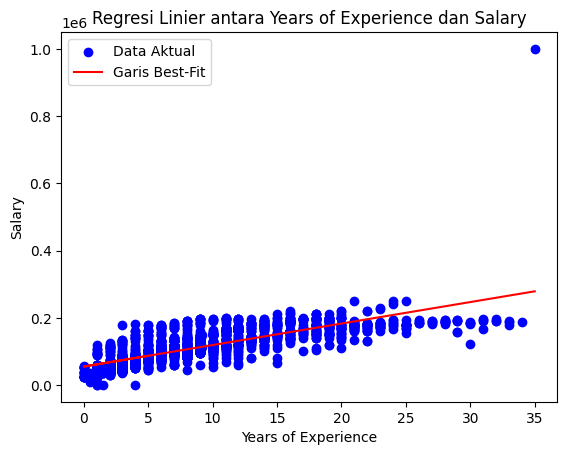

In [ ]:
# Mengambil variabel X dan Y
X = df_clean[['years_of_experience']].fillna(0)  # variabel independen
y = df_clean['salary'].fillna(0)                 # variabel dependen

# Membuat model regresi linier
model = LinearRegression()
model.fit(X, y)

# Koefisien dan intercept
print("\nHasil Regresi Linier:")
print(f"Intercept (a): {model.intercept_:.2f}")
print(f"Koefisien (b): {model.coef_[0]:.2f}")

# Persamaan garis regresi: Ŷ = a + bX
print(f"Persamaan regresi: Y = {model.intercept_:.2f} + {model.coef_[0]:.2f}X")

# Visualisasi garis best-fit
plt.scatter(X, y, color='blue', label='Data Aktual')
plt.plot(X, model.predict(X), color='red', label='Garis Best-Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Regresi Linier antara Years of Experience dan Salary')
plt.legend()
plt.show()

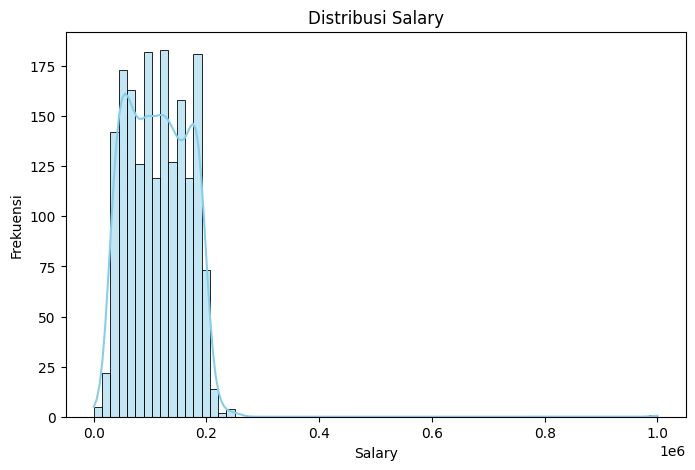

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_clean['salary'], kde=True, color='skyblue')
plt.title("Distribusi Salary")
plt.xlabel("Salary")
plt.ylabel("Frekuensi")
plt.show()


In [ ]:
shapiro_test = stats.shapiro(df_clean['salary'].dropna())
print("\nUji Normalitas Shapiro–Wilk:")
print(f"Statistic W = {shapiro_test.statistic:.4f}")
print(f"p-value = {shapiro_test.pvalue:.4f}")

if shapiro_test.pvalue > 0.05:
    print("Kesimpulan: Data Salary berdistribusi normal (Terima H0)")
else:
    print("Kesimpulan: Data Salary tidak berdistribusi normal (Tolak H0)")


Uji Normalitas Shapiro–Wilk:
Statistic W = 0.8801
p-value = 0.0000
Kesimpulan: Data Salary tidak berdistribusi normal (Tolak H0)


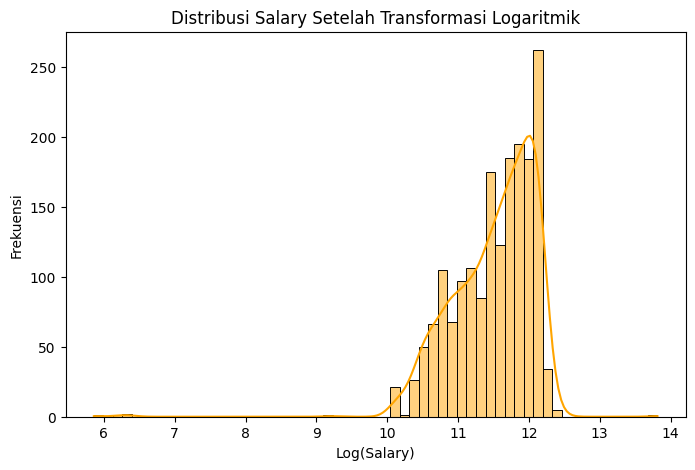

In [ ]:
df_clean['Salary_Log'] = np.log(df_clean['salary'].replace(0, np.nan))
plt.figure(figsize=(8,5))
sns.histplot(df_clean['Salary_Log'].dropna(), kde=True, color='orange')
plt.title("Distribusi Salary Setelah Transformasi Logaritmik")
plt.xlabel("Log(Salary)")
plt.ylabel("Frekuensi")
plt.show()